# Problem Set 2: Simple Linear Regression Practice Problems
### Jake Lee


---
 ## Import Libraries

In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Question 1
The data in 401K.DTA are a subset of data analyzed by Papke (1995) to study the relationship
between participation in a 401(k) pension plan and the generosity of the plan. The variable `prate`
is the percentage of eligible workers with an active account; this is the variable we would like to
explain. The measure of generosity is the plan match rate, `mrate`. This variable gives the average amount the firm contributes to each workers's pan for each one dollar contribution by the worker. 

For example, if `mrate` = 0.50, then a one dollar contribution by the worker is matched by a 50 cents contrubution by the firm.

In [2]:
q1data = '401K.DTA'
df = pd.read_stata(q1data)
df.head()

,prate,mrate,totpart,totelg,age,totemp,sole,ltotemp
0,26.100000,0.21,1653.0,6322.0,8,8709.0,0,9.072112
1,100.000000,1.42,262.0,262.0,6,315.0,1,5.752573
2,97.599998,0.91,166.0,170.0,10,275.0,1,5.616771
3,100.000000,0.42,257.0,257.0,7,500.0,0,6.214608
4,82.500000,0.53,591.0,716.0,28,933.0,1,6.838405


### i) Find the average participation rate and the average match rate in the sample of plans.

In [3]:
print("Average Participation Rate: {:.2f}%".format(df['prate'].mean()))
print("Average Plan Match Rate: {:.2f}".format(df['mrate'].mean()), "Cents")

Average Participation Rate: 87.36%
Average Plan Match Rate: 0.73 Cents


### ii) Estimate the simple regression equation where `prate` is the outcome variable and `mrate` is the explanatory variable. Report the results along with the sample size and R-squared.

In [4]:
# assign explanatory variable (independent variable)
X = df['mrate']

# assign outcome variable (dependent variable)
Y = df['prate']

# add a constant (intercept) to the independent variable
X = sm.add_constant(X)

# fit the OLS regression model
model = sm.OLS(Y, X).fit()

# regression summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  prate   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     123.7
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           1.10e-27
Time:                        12:42:38   Log-Likelihood:                -6437.0
No. Observations:                1534   AIC:                         1.288e+04
Df Residuals:                    1532   BIC:                         1.289e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         83.0755      0.563    147.484      0.000      81.971      84.180
mrate          5.8611      0.527     11.121      0.000       4.827       6.895
==============================================================================
Omnibus:                      394.767   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              870.172
Skew:                          -1.444   Prob(JB):                    1.11e-189
Kurtosis:                       5.296   Cond. No.                         2.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Sample size (No. Observations) = 1534

R-squared = 0.075

### iii) Interpret the intercept in your equation. Interperet the coefficient on `mrate`.

The Intercept or Constant is shown at the intersection of coef and const above. It represents the estimated value of `prate` (dependent variable) when `mrate` (independent variable) is held constant. This is the same as $\beta_0$.

The coefficient on `mrate` represents the estimated change in the `prate` for a one-unit change in `mrate` while holding all else constant. This is the same as $\beta_1$.

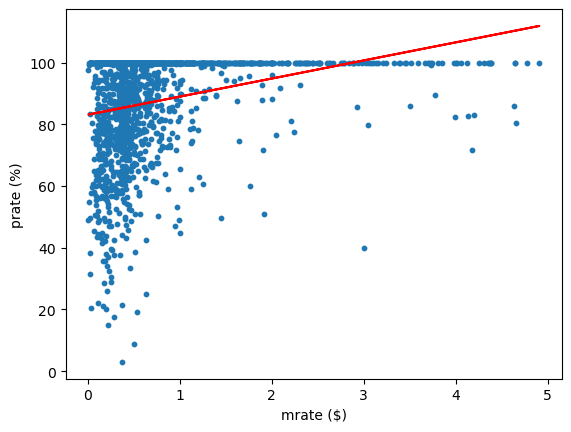

In [5]:
# plot model
x = df['mrate']
y = df['prate']

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y, s=10)
plt.plot(x, mymodel, color = 'red')
plt.xlabel('mrate ($)')
plt.ylabel('prate (%)')
plt.show()

### iv) Find the predicted prate when `mrate` = 3.5. Is this a reasonable prediction? Explain what is happening here.

From the graph above, we can see that at `mrate` = 3.5, the `prate` is 100 percent. If we were to estimate using our regression, it would obviously differ and would not be a reasonable prediction.

### v) How much of the variation in prate is explained by mrate? Is this a lot in your opinion?

From our OLS Results above, the variation is explained by $R^2 = 0.075$ and implies that there is a weak relationship between `prate` and `mrate`. It also implies the following: 
   - limited predictive power
   - low explained variability
   - limitations of the model (see where regression crosses prate = 100)
   - potential other factors having a greater influence than mrate

---

# Question 2

The data set in CEOSAL2.DTA contains information on chief executive officers for U.S.
corporations. The variable `salary` is annual compensation, in thousands of dollars, and `ceoten` is
prior number of years as company CEO

In [6]:
q2data = 'CEOSAL2.DTA'
df = pd.read_stata(q2data)
df.head()

,salary,age,college,grad,comten,ceoten,sales,profits,mktval,lsalary,lsales,lmktval,comtensq,ceotensq,profmarg
0,1161,49,1,1,9,2,6200.0,966,23200.0,7.057037,8.732305,10.051908,81,4,15.580646
1,600,43,1,1,10,10,283.0,48,1100.0,6.396930,5.645447,7.003066,100,100,16.961130
2,379,51,1,1,9,3,169.0,40,1100.0,5.937536,5.129899,7.003066,81,9,23.668638
3,651,55,1,0,22,22,1100.0,-54,1000.0,6.478509,7.003066,6.907755,484,484,-4.909091
4,497,44,1,1,8,6,351.0,28,387.0,6.208590,5.860786,5.958425,64,36,7.977208


### i) Find the average salary and the average tenure in the sample.


In [7]:
print(f"Average Salary: ${(df['salary'].mean())*1000:.2f}")
print(f"Average Tenure: {df['ceoten'].mean():.2f}", 'Years')

Average Salary: $865864.41
Average Tenure: 7.95 Years


### ii) How many CEOs are in their first year as CEO (that is, ceoten = 0)? What is the longest tenure as a CEO?

In [8]:
print("Number of CEOs in their First Year:",(df['ceoten'] == 0).count())
print("Longest tenure as a CEO:", df['ceoten'].max())

Number of CEOs in their First Year: 177
Longest tenure as a CEO: 37


### (iii) Estimate the simple regression model where log(salary) = `lsalary` is the outcome variable and `ceoten` is the explained variable. Report your results. What is the (approximate) predicted percentage increase in salary given one more year as a CEO

In [9]:
X = df['ceoten'] # independent var
Y = df['lsalary'] # dependent var

# add a intercept to independent variable
X = sm.add_constant(X)

# fit model
model = sm.OLS(Y, X).fit()

# regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                lsalary   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.334
Date:                Wed, 13 Sep 2023   Prob (F-statistic):              0.128
Time:                        12:42:38   Log-Likelihood:                -160.84
No. Observations:                 177   AIC:                             325.7
Df Residuals:                     175   BIC:                             332.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5055      0.068     95.682      0.0

An additional year of ceo tenure increases the ceo salary by .97% ($\beta_1 * 100$ for
a log-level model) on average.

---

# Question 3

For the population of firms in the chemical industry, let `rd` denote annual expenditures on research
and development, and let `sales` denote annual sales (both are in millions of dollars)

### (i) Write down a simple regression model that implies a constant elasticity between rd and sales. Which parameter is the elasticity?

$\ln(rd)$ = $\beta_0 + \beta_1
ln(sales) + \epsilon$  , where $\beta_1$ is the elasticity measure

### (ii) Now, estimate the model using the data in RDCHEM.DTA. What is the estimated elasticity of `lrd` with respect to `lsales`? Explain in words what this elasticity means.

In [10]:
data = 'RDCHEM.DTA'
df = pd.read_stata(data)
df.head()

,rd,sales,profits,rdintens,profmarg,salessq,lsales,lrd
0,430.600006,4570.200195,186.899994,9.421906,4.089536,2.088673e+07,8.427312,6.065180
1,59.000000,2830.000000,467.000000,2.084806,16.501766,8.008900e+06,7.948032,4.077538
2,23.500000,596.799988,107.400002,3.937668,17.995979,3.561702e+05,6.391582,3.157000
3,3.500000,133.600006,-4.300000,2.619760,-3.218563,1.784896e+04,4.894850,1.252763
4,1.700000,42.000000,8.000000,4.047619,19.047619,1.764000e+03,3.737670,0.530628


In [11]:
X = df['lsales'] # independent var
Y = df['lrd'] # dependent var

# add a intercept to independent variable
X = sm.add_constant(X)

# fit model
model = sm.OLS(Y, X).fit()

# regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    lrd   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     302.7
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           3.20e-17
Time:                        12:42:38   Log-Likelihood:                -24.021
No. Observations:                  32   AIC:                             52.04
Df Residuals:                      30   BIC:                             54.97
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.1047      0.453     -9.066      0.0

From above, we can see that the elasticity is about 1.08 ($\beta_1 = 1.08$). This implies that a 1 percent increase in is sales yields a 1.08 percent increase in r&d expenditure on average.

---

# Question 4

Use the data in MEAP93.DTA that contains data on student performance and school attributes.
We want to explore the relationship between the math pass rate `math10` and spending per student
`expend`.

In [12]:
data = 'MEAP93.DTA'
df = pd.read_stata(data)
df.head()

,lnchprg,enroll,staff,expend,salary,benefits,droprate,gradrate,math10,sci11,totcomp,ltotcomp,lexpend,lenroll,lstaff,bensal,lsalary
0,1.4,1862,112.599998,5765,37498.0,7420,2.9,89.199997,56.400002,67.900002,44918.0,10.712594,8.659560,7.529407,4.723842,0.197877,10.532043
1,2.3,11355,101.199997,6601,48722.0,10370,1.3,91.400002,42.700001,65.300003,59092.0,10.986851,8.794976,9.337414,4.617099,0.212840,10.793886
2,2.7,7685,114.000000,6834,44541.0,7313,3.5,91.400002,43.799999,54.299999,51854.0,10.856188,8.829665,8.947025,4.736198,0.164186,10.704165
3,3.4,1148,85.400002,3586,31566.0,5989,3.6,86.599998,25.299999,60.000000,37555.0,10.533562,8.184793,7.045776,4.447346,0.189729,10.359836
4,3.4,1572,96.099998,3847,29781.0,5545,0.0,100.000000,15.300000,65.800003,35326.0,10.472375,8.255049,7.360104,4.565389,0.186193,10.301626


### i) Do you think each additional dollar spent has the same effect on the pass rate, or does a
diminishing effect seem more appropriate? Explain.

Text(0, 0.5, 'Pass Rate (%)')

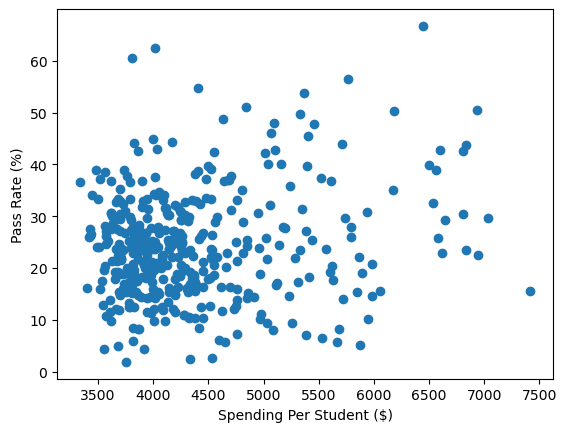

In [13]:
plt.scatter(df['expend'], df['math10'])
plt.xlabel("Spending Per Student ($)")
plt.ylabel("Pass Rate (%)")

From the Scatter Plot above, we can see that there is a very weak positive correlation between Spending Per Student `expend` and Pass Rate `math10`. This implies that a diminishing effect may be more appropriate.

### ii) Estimate the simple regression model where math10 is the outcome variable and log(expend)
is the explanatory variable. Report the results, including the sample size and R-squared.

In [14]:
X = df['lexpend'] # independent var
Y = df['math10'] # dependent var

# add an intercept to independent variable
X = sm.add_constant(X)

# fit model
model = sm.OLS(Y, X).fit()

# regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 math10   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     12.41
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           0.000475
Time:                        12:42:38   Log-Likelihood:                -1531.4
No. Observations:                 408   AIC:                             3067.
Df Residuals:                     406   BIC:                             3075.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.3411     26.530     -2.614      0.0

$S = 408$

$R^2 = 0.03$

### iii) How big is the estimated spending effect? Namely, if spending increases by 10%, what is the
estimated percentage point increase in math10?

If spending increases by 10 percent, the Pass Rate will increase by about 1.1. ($\beta_1 * Spending Increase = 11.1611 * 0.10 = 1.1$)

### iv) One might worry that regression analysis can produce fitted values for math10 that are greater
than 100. Why is this not much of a worry in this data set?

The Pass Rate `math10` cannot be greater than 100 pecent. See below for max percentage.

In [15]:
print(f"Highest Pass Rate: {round(df['math10'].max())}%")


Highest Pass Rate: 67%
